<a href="https://colab.research.google.com/github/yipf1123/human_edu/blob/main/Python/230327%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#모델 1


## 분류 문제
- 도미 데이터 준비하기

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

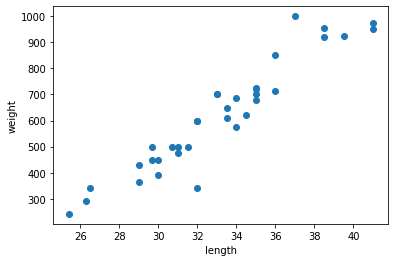

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

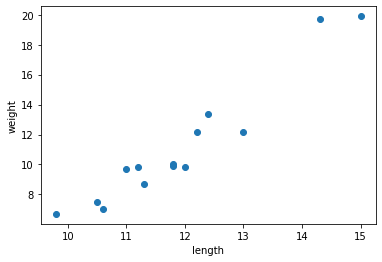

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [9]:
# 1은 도미
# 0은 빙어
fish_target = [1] * 35 + [0] *14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 지도학습 알고리즘 적용

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier()
# 알고리즘 + 데이터 활용해서 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [12]:
kn.score(fish_data,fish_target) #1.0 은 정확도가 100%

1.0

In [14]:
kn.predict([[30,600]])

array([1])

In [15]:
kn.predict([[12,0]])

array([0])

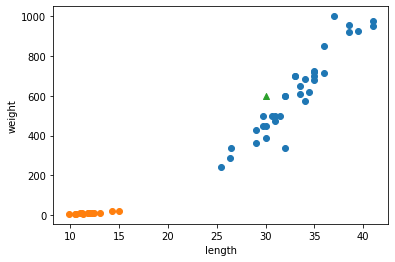

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#모델 2

In [16]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 +[0]*14

## 훈련 데이터 테스트 데이터로 분리
- 리스트로 numpy배열로 좋음


In [20]:
# 도미데이터
train_input = fish_data[:35]
train_target = fish_target[:35]
# 빙어데이터터
test_input = fish_data[35:]
test_target = fish_target[35:]

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier()
# 알고리즘 + 데이터 활용해서 학습
kn = kn.fit(train_input, train_target) #도미데이터로 학습하고
kn.score(test_input, test_target) #빙어데이터로 테스트함
# 그래서 정확도가 0%

0.0

NumPy 배열 변환

In [23]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr[:5])
print(input_arr.shape)


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
(49, 2)


In [24]:
# 데이터 섞기
np.random.seed(42)
index= np.arange(49)
np.random.shuffle(index)

In [25]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [27]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [29]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])      

[ 32. 340.] [ 32. 340.]


In [30]:
test_input = input_arr[index[32:]]
test_target = target_arr[index[32:]]

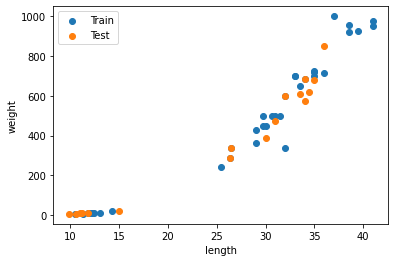

In [32]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], label = "Train")
plt.scatter(test_input[:, 0], test_input[:, 1], label= "Test")
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()